### 情感词典

In [3]:
import re
import pandas as pd
# from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

# Download required resources
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')

# Define a function for text preprocessing
def preprocess_text(text):
    if isinstance(text, str):
        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Tokenize the text
        words = word_tokenize(text)

        # Remove stopwords
        # words = [word for word in words if word not in stopwords.words('english')]

        # Lemmatize the words
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]
        # Convert to lowercase
        words = [word.lower() for word in words]
        # Join the words back into a single string
        return ' '.join(words)
    else:
        return ''

# Define a function to remove duplicate rows
def remove_duplicates(df):
    return df.drop_duplicates(subset='text')

# Read the CSV file
file_path = "D:\\Congress_Record_2023.csv"
congress_data = pd.read_csv(file_path)

# Apply the preprocessing function to the 'text' column
congress_data['processed_text'] = congress_data['text'].apply(preprocess_text)

# Remove duplicate rows
congress_data = remove_duplicates(congress_data)

# Display the first few rows of the processed data
print(congress_data.head())

  congress        date chamber speaker_bioguide  char_count  word_count  \
0      118  20230104.0   House          C001053        71.0        13.0   
1      118  20230104.0   House          A000371        48.0        10.0   
2      118  20230105.0   House          J000307      7786.0      1421.0   
3      118  20230105.0   House          A000371      1125.0       195.0   
4      118  20230105.0   House          B001311      3307.0       582.0   

                                                text  \
0  Madam Clerk, I move that the House do now adjo...   
1   Madam Clerk, on that I demand the yeas and nays.   
2  Madam Clerk, I rise to nominate Kevin McCarthy...   
3  Madam Clerk, I rise to nominate Hakeem Jeffrie...   
4  Madam Clerk, I rise to place in  nomination th...   

                                      processed_text  
0  madam clerk i move that the house do now adjou...  
1       madam clerk on that i demand the yea and nay  
2  madam clerk i rise to nominate kevin mccarth

In [4]:
# 删除text列
congress_data.drop(columns=['text'],inplace=True)

In [5]:
congress_data

,congress,date,chamber,speaker_bioguide,char_count,word_count,processed_text
0,118,20230104.0,House,C001053,71.0,13.0,madam clerk i move that the house do now adjou...
1,118,20230104.0,House,A000371,48.0,10.0,madam clerk on that i demand the yea and nay
2,118,20230105.0,House,J000307,7786.0,1421.0,madam clerk i rise to nominate kevin mccarthy ...
3,118,20230105.0,House,A000371,1125.0,195.0,madam clerk i rise to nominate hakeem jeffries...
4,118,20230105.0,House,B001311,3307.0,582.0,madam clerk i rise to place in nomination the ...
...,...,...,...,...,...,...,...
26658,118,20231222.0,House,L000569,640.0,105.0,mr speaker i rise today to ask my colleague to...
26659,118,20231222.0,House,H001067,1289.0,214.0,mr speaker i rise today to honor amie fraley o...
26660,118,20231226.0,House,J000298,928.0,140.0,mr speaker i rise today to recognize northeast...
26661,118,20231229.0,House,P000613,219.0,39.0,mr speaker i unfortunately wa unable to be pre...


In [6]:
nrc = pd.read_excel('NRC-Emotion-Lexicon.xlsx', usecols='A,AP:AY')
nrc = nrc.rename(columns={'English Word':'Engword'})
nrc.head()

d:\Anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Engword,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,1,0,0,0,1,0,1,0,0
3,abandoned,0,1,1,0,0,1,0,1,0,0
4,abandonment,0,1,1,0,0,1,0,1,1,0


In [7]:
df=congress_data

In [8]:
# 将NRC词典转换为字典
nrc_dict = nrc.set_index('Engword').T.to_dict('list')

# 定义函数来计算情感得分
def compute_sentiment_scores(text):
    words = text.split()
    sentiment_scores = [0]*10
    for word in words:
        if word in nrc_dict:
            sentiment_scores = [sum(x) for x in zip(sentiment_scores, nrc_dict[word])]
    return dict(zip(nrc.columns[1:], sentiment_scores))

# 应用函数到processed_text列的每一行
df['sentiment_scores'] = df['processed_text'].apply(compute_sentiment_scores)

# 拆分字典为多个列
df = pd.concat([df.drop(['sentiment_scores'], axis=1), df['sentiment_scores'].apply(pd.Series)], axis=1)

In [9]:
df.head()

,congress,date,chamber,speaker_bioguide,char_count,word_count,processed_text,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,118,20230104.0,House,C001053,71.0,13.0,madam clerk i move that the house do now adjou...,0,0,0,1,0,0,0,0,0,0
1,118,20230104.0,House,A000371,48.0,10.0,madam clerk on that i demand the yea and nay,0,2,1,0,0,0,0,0,0,0
2,118,20230105.0,House,J000307,7786.0,1421.0,madam clerk i rise to nominate kevin mccarthy ...,73,54,19,49,9,29,36,28,14,71
3,118,20230105.0,House,A000371,1125.0,195.0,madam clerk i rise to nominate hakeem jeffries...,14,6,4,6,3,2,8,2,3,14
4,118,20230105.0,House,B001311,3307.0,582.0,madam clerk i rise to place in nomination the ...,34,18,5,15,5,8,5,8,5,25


In [10]:
df.to_csv('D:\\CR_2023_Sentiment_Scores.csv', index=False)

In [1]:
import pandas as pd
df = pd.read_csv('D:\\CR_2023_Sentiment_Scores.csv')
# 保存前10行至新的CSV文件
df.head(10).to_csv('D:\\CR_2023_sample.csv', index=False)

In [2]:
import pandas as pd
df = pd.read_csv('D:\\Congress_Record_2024.csv')
# 保存前10行至新的CSV文件
df.head(10).to_csv('D:\\CR_2024_sample.csv', index=False)

C:\Users\Hawaii\AppData\Local\Temp\ipykernel_56568\2897486458.py:2: DtypeWarning: Columns (1,2,3,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,2

### 道德词典

In [ ]:
!pip install moralstrength

In [ ]:
import pandas as pd
import moralstrength     # 英文道德词典
from moralstrength import lexicon_use
from moralstrength.moralstrength import estimate_morals


In [2]:

df = pd.read_csv('D:\\CR_2023_Sentiment_Scores.csv')

lexicon_use.select_version('latest')

df_morals = estimate_morals(df['processed_text'].tolist(), process=True)

df = pd.concat([df, df_morals], axis=1)
df.head()

C:\Users\Hawaii\AppData\Roaming\Python\Python311\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


,congress,date,chamber,speaker_bioguide,Women,Minority,Category,state,party,char_count,...,Fear,Joy,Sadness,Surprise,Trust,care,fairness,loyalty,authority,purity
0,118,20230104,House,C001053,0.0,0.0,White,OK,R,71,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,118,20230104,House,A000371,0.0,1.0,Hispanic,CA,D,48,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2,118,20230105,House,J000307,0.0,1.0,Black,MI,R,7786,...,29,36,28,14,71,3.724242,7.757576,7.302551,7.600850,8.000
3,118,20230105,House,A000371,0.0,1.0,Hispanic,CA,D,1125,...,2,8,2,3,14,8.571429,8.166667,6.392857,7.202381,8.125
4,118,20230105,House,B001311,0.0,0.0,White,NC,R,3307,...,8,5,8,5,25,3.911111,4.400000,7.181250,5.971429,8.000


In [3]:
df.to_csv('D:\\CR_2023_Moral_Strength.csv', index=False)

In [4]:
# 删除Category列不为White或Hispanic或Black或Asian的行
df = df[df['Category'].isin(['White', 'Hispanic', 'Black', 'Asian'])]

In [7]:
# 删除word_count列小于20的行
df = df[df['word_count'] >= 20]
# 将care、fairness、loyalty、authority、purity列的缺失值替换为0
df[['care', 'fairness', 'loyalty', 'authority', 'purity']] = df[['care', 'fairness', 'loyalty', 'authority', 'purity']].fillna(0)

C:\Users\Hawaii\AppData\Local\Temp\ipykernel_61420\2524186099.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['care', 'fairness', 'loyalty', 'authority', 'purity']] = df[['care', 'fairness', 'loyalty', 'authority', 'purity']].fillna(0)


In [14]:
# Minority列的数据类型可能是浮点数（float），而不是整数（int）。你可以使用pandas的astype函数将其转换为整数。
df['Minority'] = df['Minority'].astype(int)
df['Women'] = df['Women'].astype(int)
df.head()

,congress,date,chamber,speaker_bioguide,Women,Minority,Category,state,party,char_count,...,Fear,Joy,Sadness,Surprise,Trust,care,fairness,loyalty,authority,purity
2,118,20230105,House,J000307,0,1,Black,MI,R,7786,...,29,36,28,14,71,3.724242,7.757576,7.302551,7.600850,8.000000
3,118,20230105,House,A000371,0,1,Hispanic,CA,D,1125,...,2,8,2,3,14,8.571429,8.166667,6.392857,7.202381,8.125000
4,118,20230105,House,B001311,0,0,White,NC,R,3307,...,8,5,8,5,25,3.911111,4.400000,7.181250,5.971429,8.000000
5,118,20230105,House,M001199,0,1,Hispanic,FL,R,6216,...,17,34,8,11,58,5.333333,8.166667,5.792857,6.684848,2.857143
6,118,20230105,House,C001101,1,0,White,MA,D,2202,...,9,8,7,6,19,6.511111,7.583333,7.628571,5.827381,7.722222


In [15]:
df.to_csv('D:\\CR_2023_Moral_Strength_Filtered.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


<Figure size 1000x600 with 0 Axes>

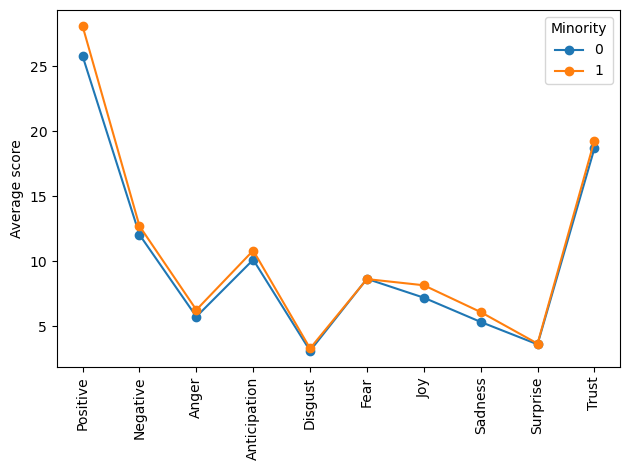

<Figure size 1000x600 with 0 Axes>

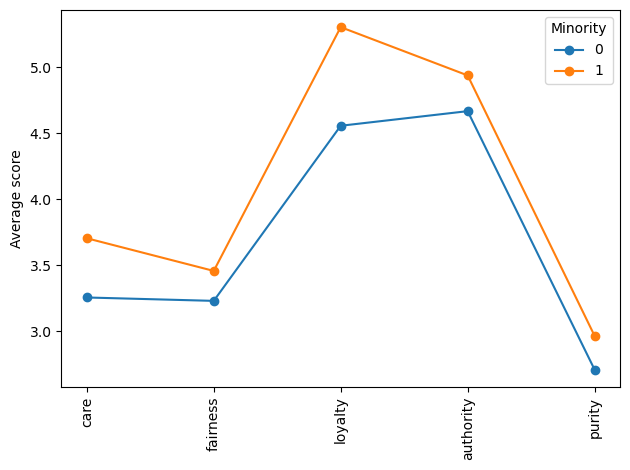

In [24]:

# 选择情感得分和道德得分的列
columns = ['Positive', 'Negative', 'Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust', 'care', 'fairness', 'loyalty', 'authority', 'purity']

# 将缺失值替换为0
df[columns] = df[columns].fillna(0)

# 计算每组的均值
df_grouped = df[columns + ['Minority']].groupby('Minority').mean()

# 可视化情感得分
sentiment_scores = ['Positive', 'Negative', 'Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust']
plt.figure(figsize=(10, 6))  # 调整图形尺寸
df_grouped[sentiment_scores].T.plot(kind='line', marker='o')
# plt.title('Average sentiment scores by Minority')
plt.ylabel('Average score')
plt.xticks(range(len(sentiment_scores)), sentiment_scores, rotation=90)  # 手动设置刻度标签
plt.tight_layout()  # 自动调整子图参数
plt.show()

# 可视化道德得分
moral_scores = ['care', 'fairness', 'loyalty', 'authority', 'purity']
plt.figure(figsize=(10, 6))  # 调整图形尺寸
df_grouped[moral_scores].T.plot(kind='line', marker='o')
# plt.title('Average moral scores by Minority')
plt.ylabel('Average score')
plt.xticks(range(len(moral_scores)), moral_scores, rotation=90)  # 手动设置刻度标签
plt.tight_layout()  # 自动调整子图参数
plt.show()

#### 分族裔可视化

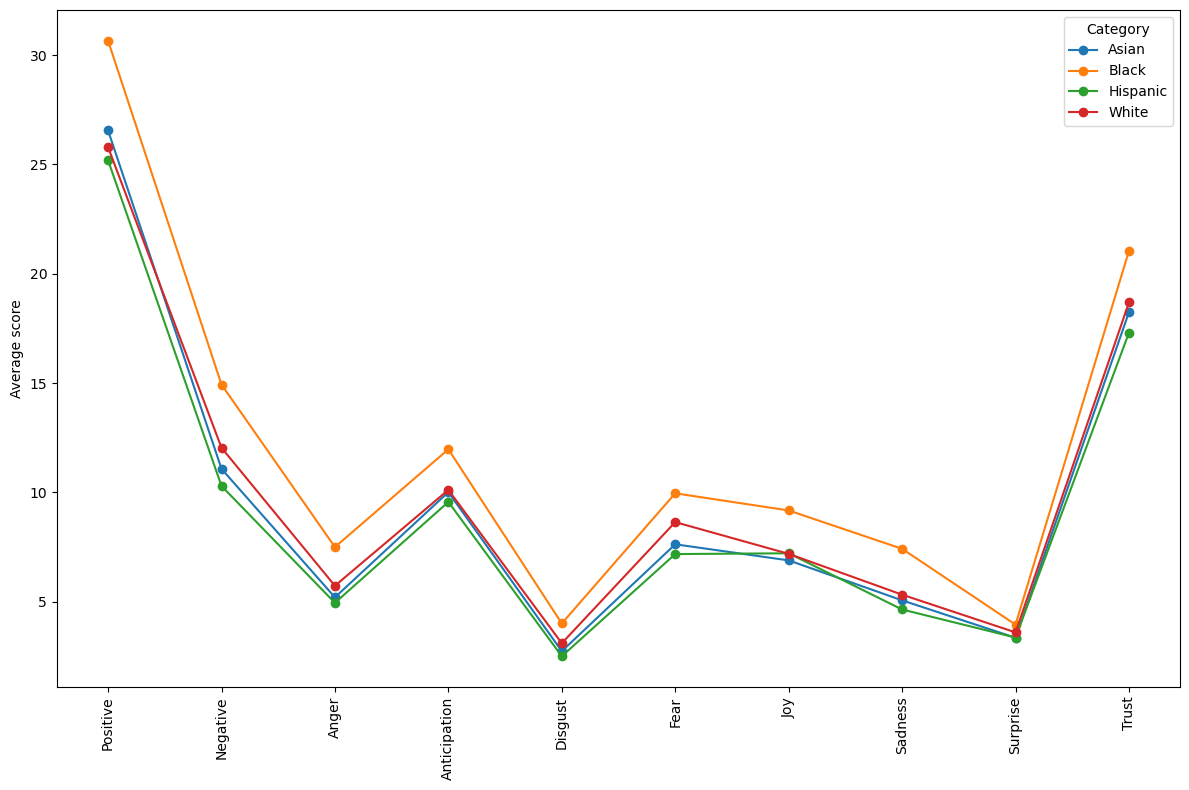

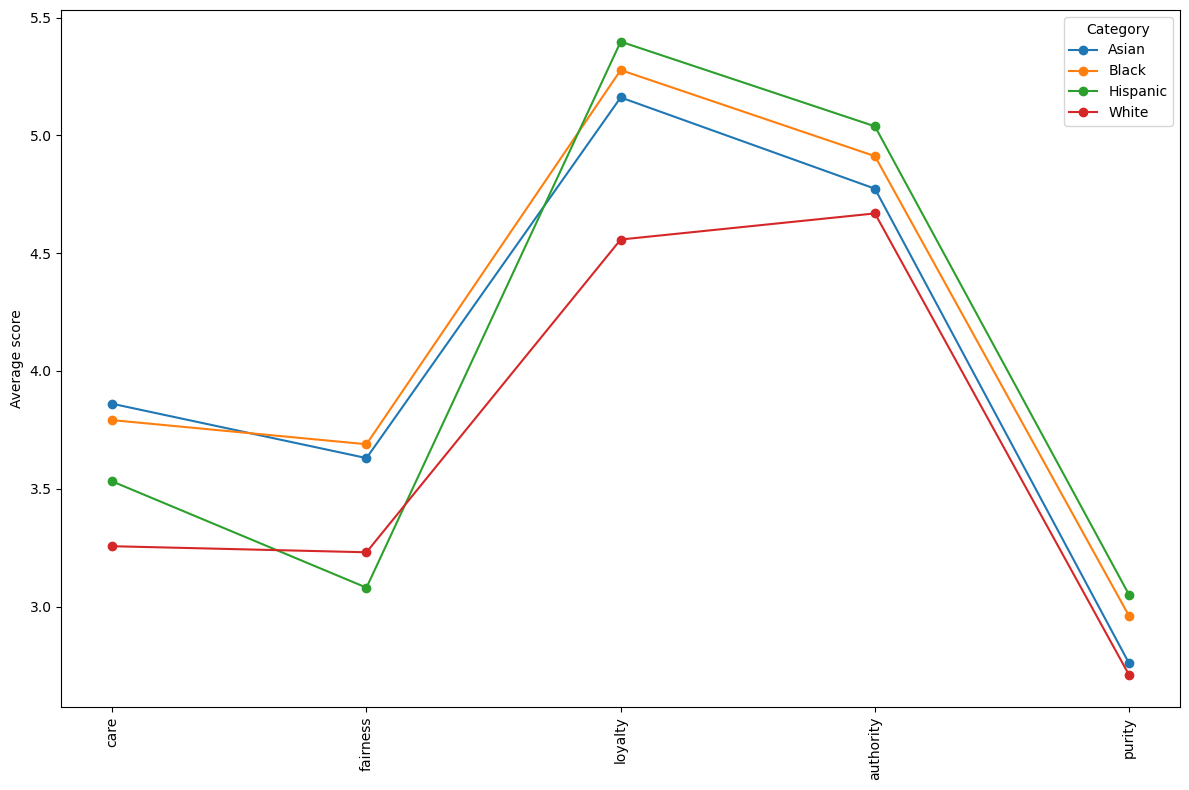

In [36]:
columns = ['Positive', 'Negative', 'Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust', 'care', 'fairness', 'loyalty', 'authority', 'purity']

# 将缺失值替换为0
df[columns] = df[columns].fillna(0)

# 筛选出 Asian、Black、Hispanic 和 White 四种族裔的数据
categories = ['Asian', 'Black', 'Hispanic', 'White']
df_filtered = df[df['Category'].isin(categories)]

# 计算每种族裔的均值
df_grouped = df_filtered[columns + ['Category']].groupby('Category').mean()

# 可视化情感得分
sentiment_scores = ['Positive', 'Negative', 'Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust']
df_grouped[sentiment_scores].T.plot(kind='line', marker='o', figsize=(12, 8))
# plt.title('Average sentiment scores by Category')
plt.ylabel('Average score')
plt.xticks(range(len(sentiment_scores)), sentiment_scores, rotation=90)  # 手动设置刻度标签
plt.legend(title='Category')
plt.tight_layout()  # 自动调整子图参数
plt.show()

# 可视化道德得分
moral_scores = ['care', 'fairness', 'loyalty', 'authority', 'purity']
df_grouped[moral_scores].T.plot(kind='line', marker='o', figsize=(12, 8))
# plt.title('Average moral scores by Category')
plt.ylabel('Average score')
plt.xticks(range(len(moral_scores)), moral_scores, rotation=90)  # 手动设置刻度标签
plt.legend(title='Category')
plt.tight_layout()  # 自动调整子图参数
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


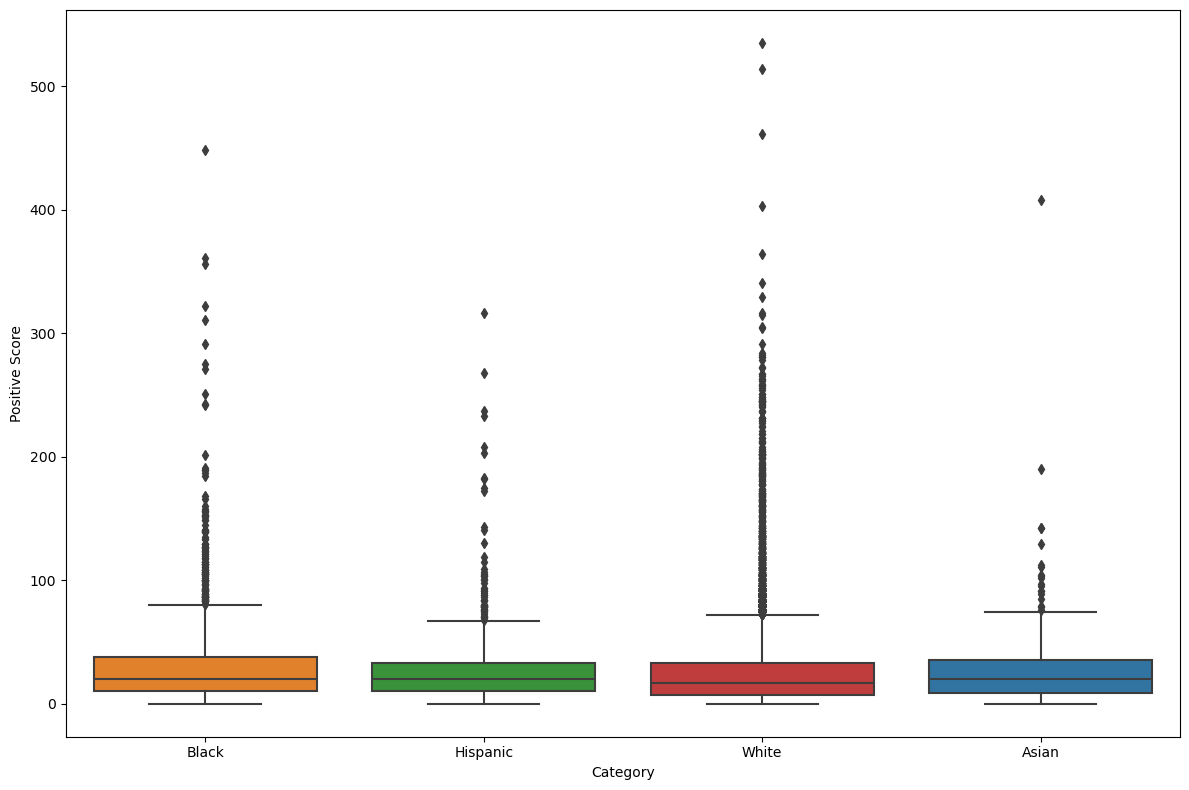

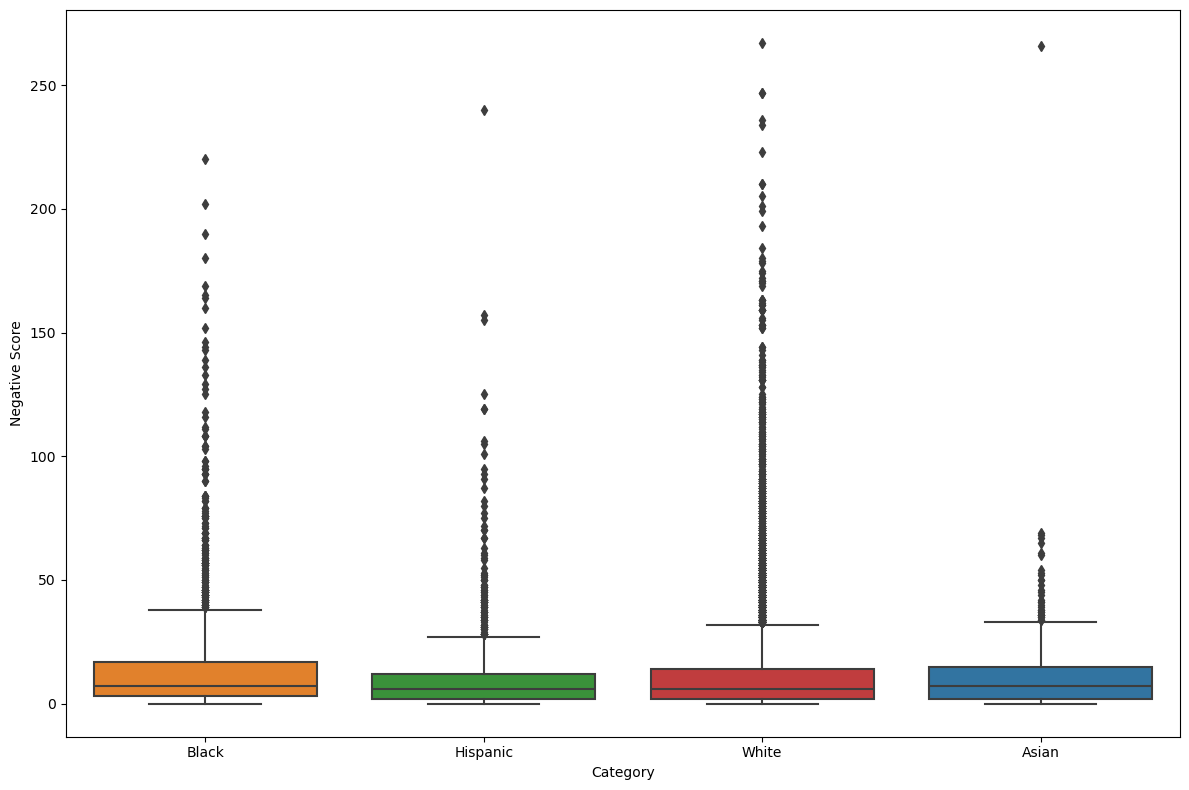

In [33]:
# 筛选出 Asian、Black、Hispanic 和 White 四种族裔的数据
categories = ['Asian', 'Black', 'Hispanic', 'White']
df_filtered = df[df['Category'].isin(categories)]

# 定义颜色映射
color_map = {'Asian': 'C0', 'Black': 'C1', 'Hispanic': 'C2', 'White': 'C3'}

# 绘制 Positive 得分的箱线图
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Positive', data=df_filtered, palette=color_map)
# plt.title('Boxplot of Positive Scores by Category')
plt.xlabel('Category')
plt.ylabel('Positive Score')
plt.tight_layout()
plt.show()

# 绘制 Negative 得分的箱线图
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Negative', data=df_filtered, palette=color_map)
# plt.title('Boxplot of Negative Scores by Category')
plt.xlabel('Category')
plt.ylabel('Negative Score')
plt.tight_layout()
plt.show()